In [1]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
data= pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
#exploring data a bit
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.shape

(9134, 24)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
#Rename the columns so they follow the PE8 (snake case)
#Style Guide for Python Code written by Guido himself :)
#wondering what is snake_case, check wikipedia :) https://en.wikipedia.org/wiki/Snake_case#:~:text=Snake%20case%20(stylized%20as%20snake_case,subroutine%20names%2C%20and%20for%20filenames.

def snake_case(data):
    data.columns=[e.lower().replace(' ', '_') for e in data.columns]
    return data

snake_case(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [13]:
#Change effective to date column to datetime format
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])

#let's check data again, our effective to date is changed now 
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [14]:
# check null values
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [15]:

#if we want percentage
data.isna().sum()/len(data)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [17]:
# we noticed from the income above we have so many zeros, we need to deal with it
data['income'].value_counts()

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: income, Length: 5694, dtype: int64

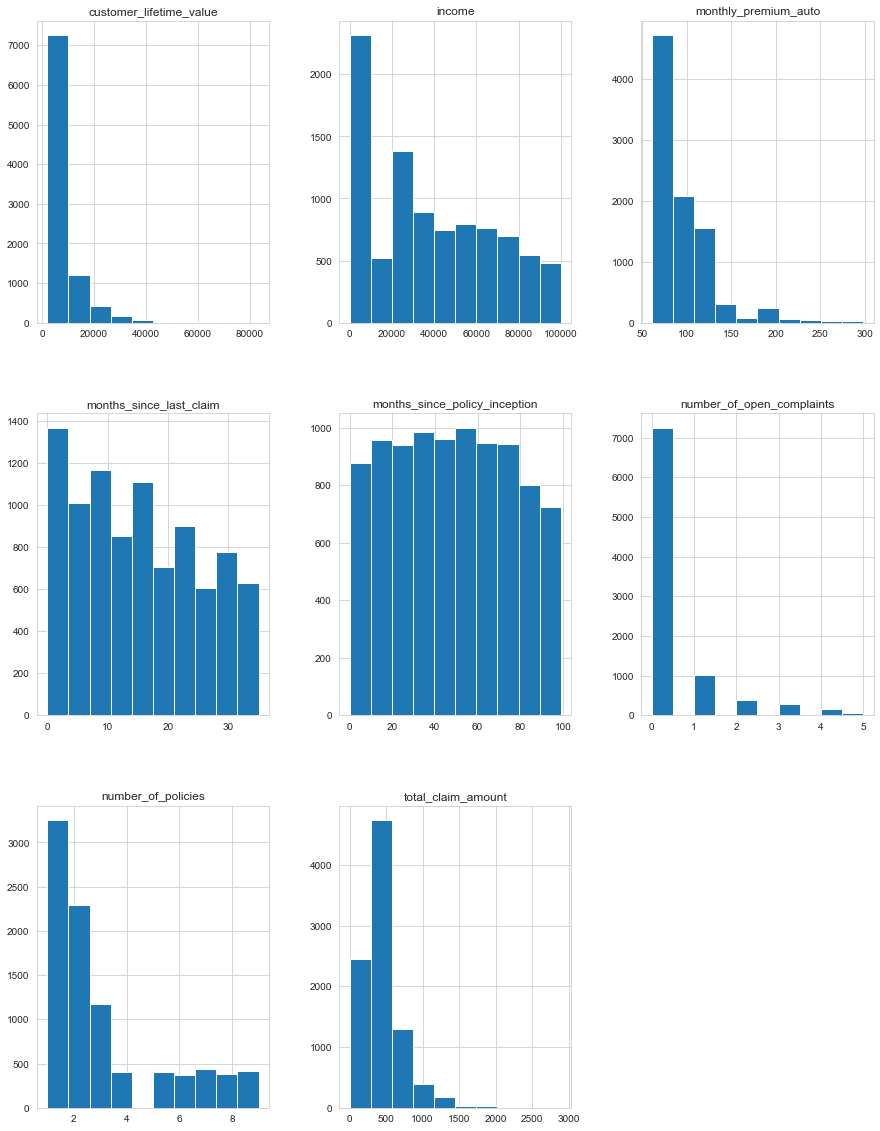

In [18]:
data.hist(figsize = (15,20));

In [19]:
# what to do with zeros?
#replace zeros with median 
median_income=data['income'].median(skipna=True)
data['income']=data.income.mask(data.income==0,median_income)

In [20]:
data['income'].value_counts()

33889.5    2317
95697.0      12
20978.0       7
40864.0       7
61108.0       7
           ... 
18779.0       1
61085.0       1
25074.0       1
49057.0       1
18944.0       1
Name: income, Length: 5694, dtype: int64

In [21]:
#distinguish between discreete and continous variables 
#we know that numerical data can be discrete or continous. discrete data can take only certain values, r good to clusters
numericals = data.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69,32,5,0,1,384.811147
1,6979.535903,33889.5,94,13,42,0,8,1131.464935
2,12887.431650,48767.0,108,18,38,0,2,566.472247
3,7645.861827,33889.5,106,18,65,0,7,529.881344
4,2813.692575,43836.0,73,12,44,0,1,138.130879


In [25]:
#disccrete have normally less unique values than ocntinous (that can take any values)
numericals.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [27]:
#create a variable that stores only discrete values
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [28]:
discrete

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

In [29]:
continuous = list(numericals.drop(columns = discrete).columns)

In [30]:
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [32]:
#what to do with categrical data?
categorical = data.select_dtypes(object)

In [33]:
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [35]:
categorical_only = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]

In [37]:
# we have no customer_id anymore
categorical_only

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [38]:
#9. create a dataframe with categorical_only
categorical_df = data[categorical_only]

In [39]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## lab 3 cleaning categorical data 

In [40]:
discrete_df = data[discrete]
discrete_df.shape

(9134, 3)

In [41]:
continuous_df = data[continuous]
continuous_df.shape

(9134, 5)

In [43]:
#correletion matrix
corr_matrix=numericals.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.012566,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.012566,1.000000,-0.014318,-0.030895,0.008274,0.011959,-0.004616,-0.265521
monthly_premium_auto,0.396262,-0.014318,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.030895,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,0.008274,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.011959,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.004616,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.265521,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


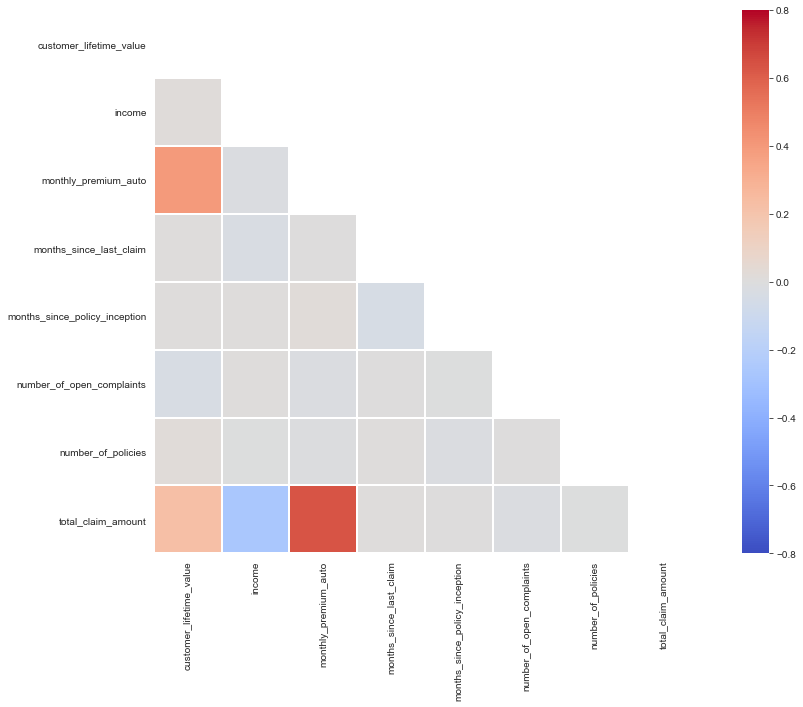

In [44]:
mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

# what did we notice?
*there is a positive relationship between customer_lifetime_value and monthly premium auto,
*and a positive correlation ^monthly premium auto and total_claim amount 

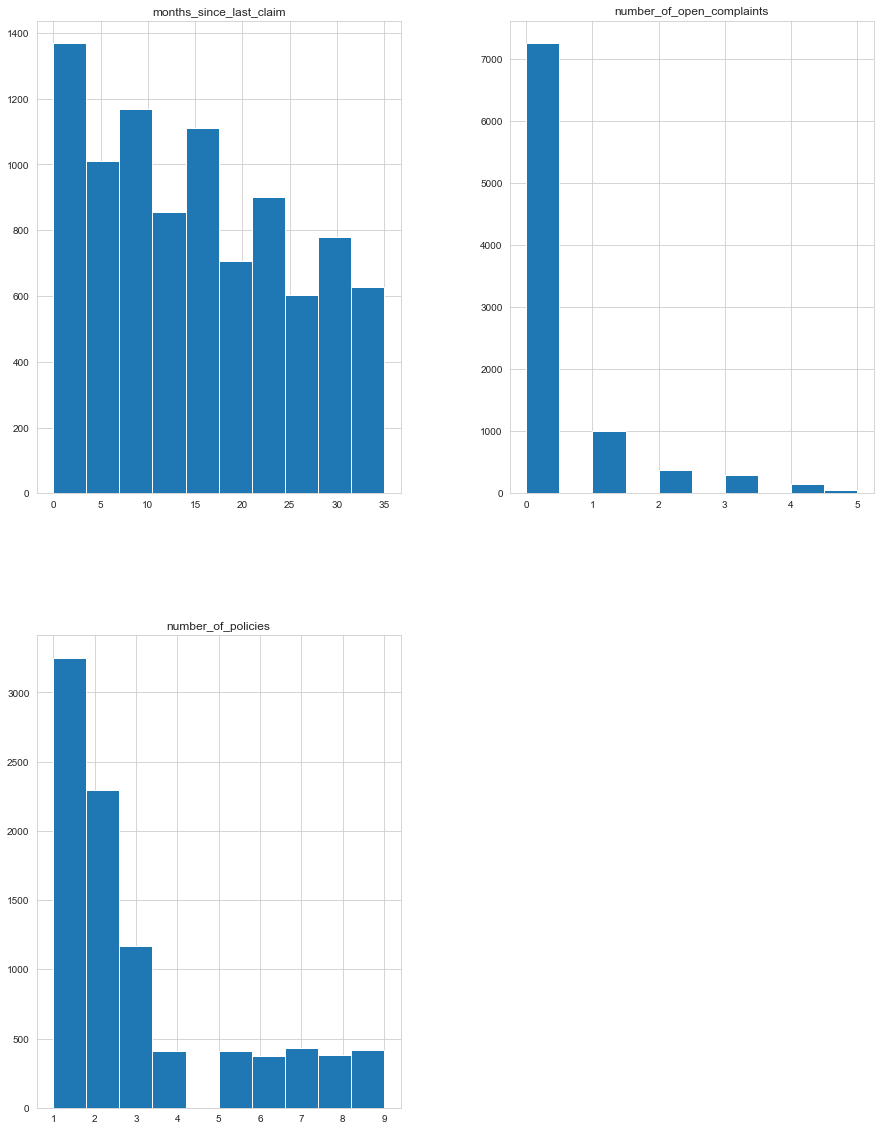

In [46]:
# plotting discrete values
discrete_df.hist(figsize = (15,20));

In [48]:
# creating a function
def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()


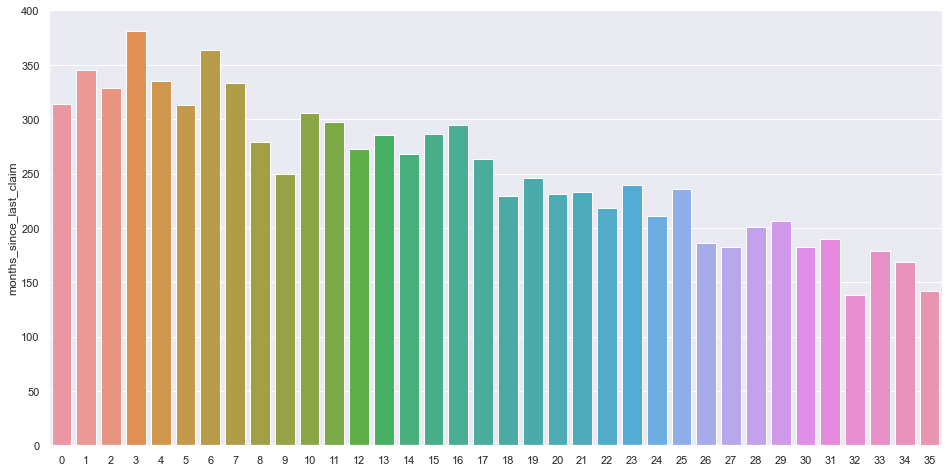

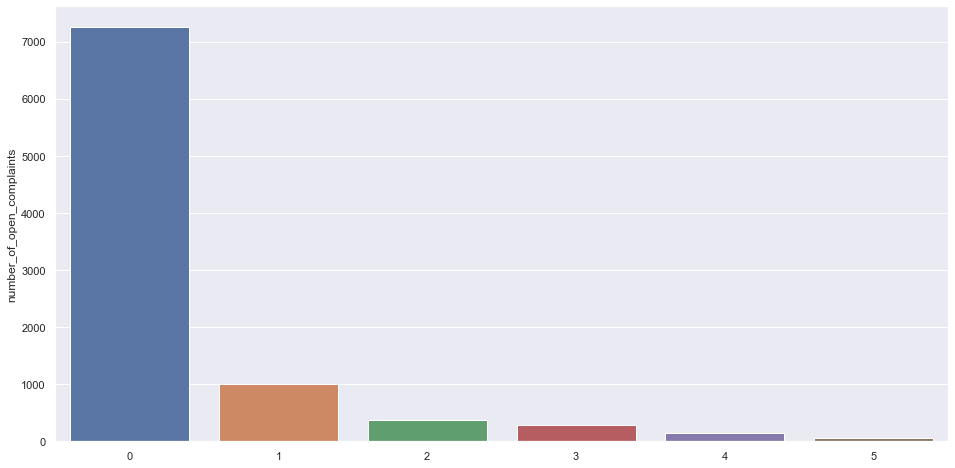

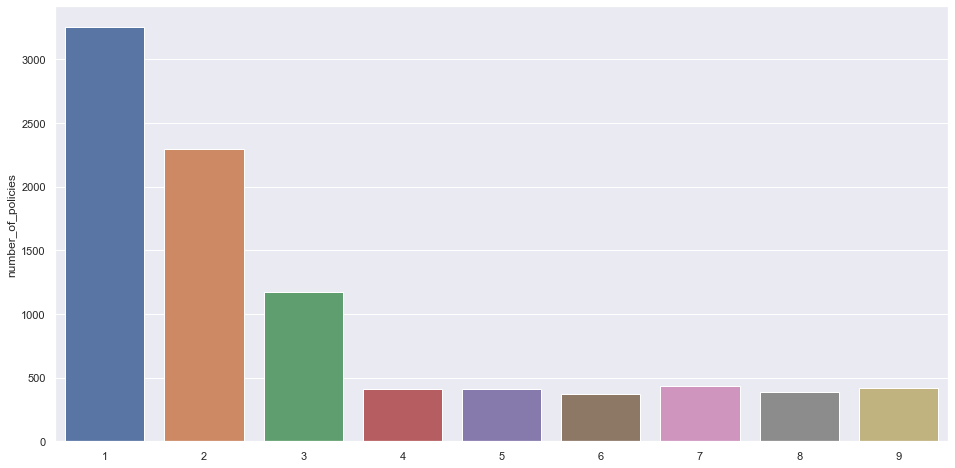

In [49]:
df_bar(discrete_df)

In [52]:
# here is continuous 

import matplotlib.colors as mcolors

def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col])
        
    plt.show()

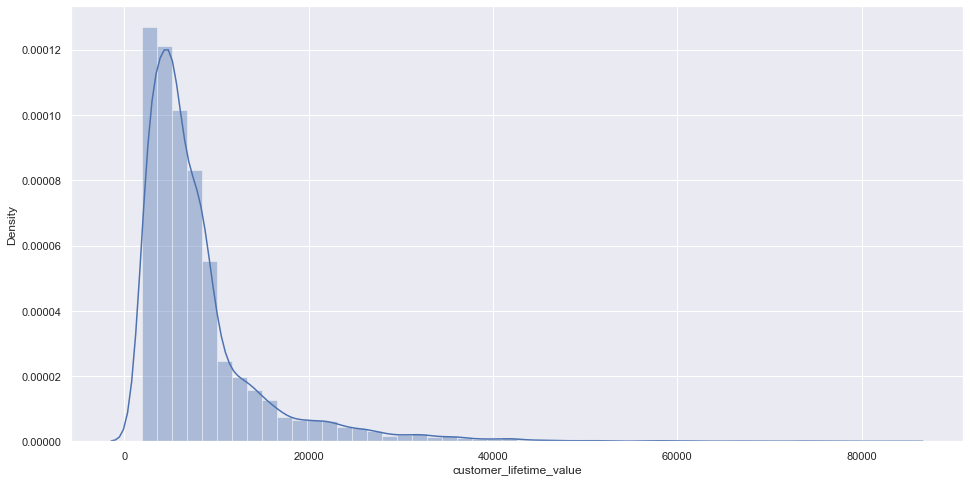

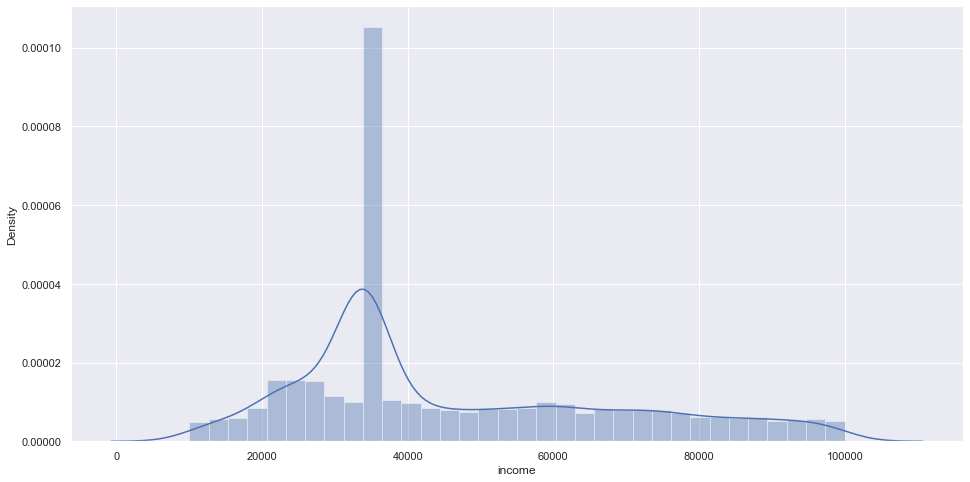

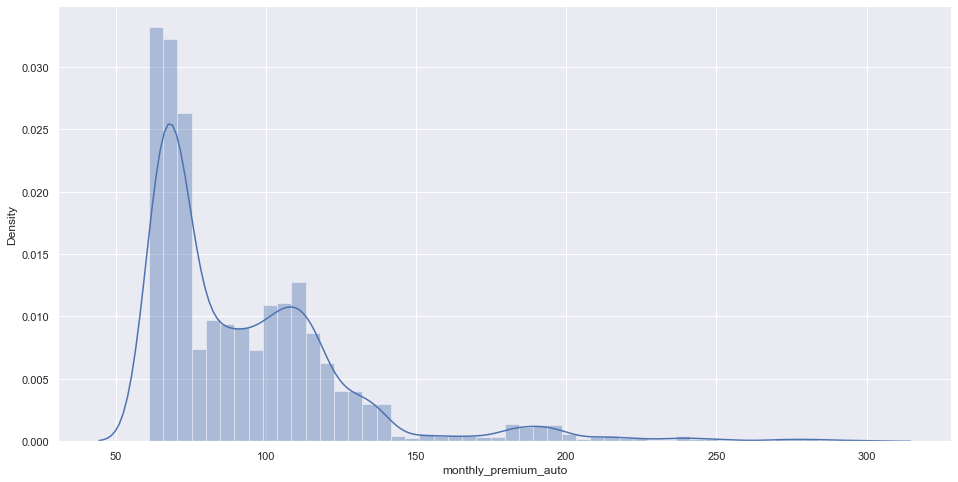

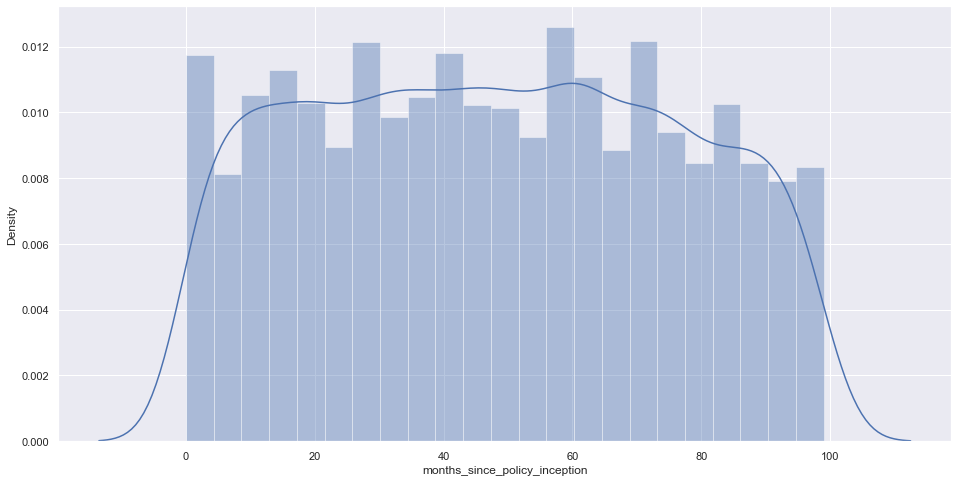

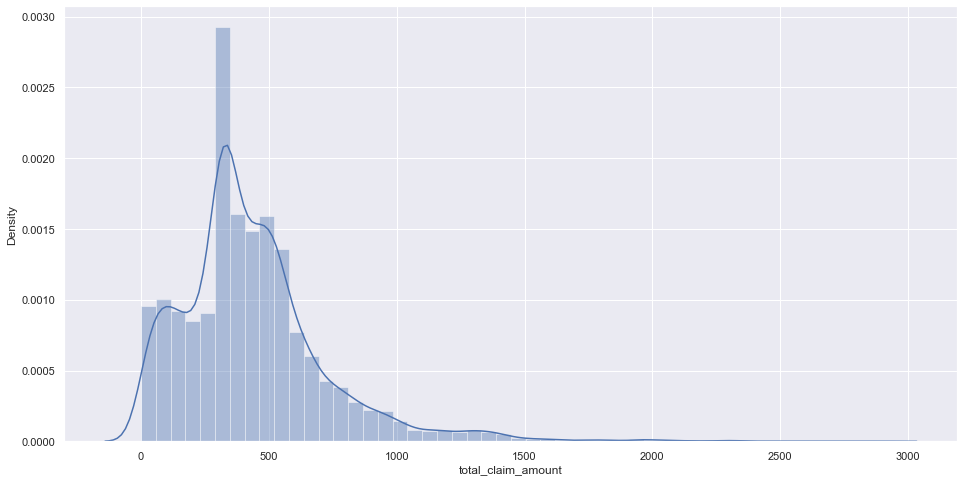

In [53]:
df_hist(continuous_df);

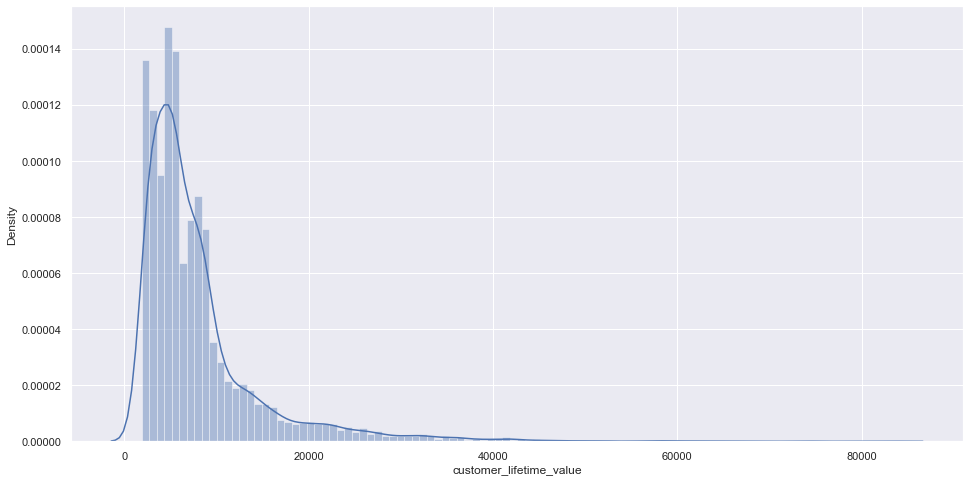

In [54]:
sns.distplot(continuous_df["customer_lifetime_value"], bins = 100);

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

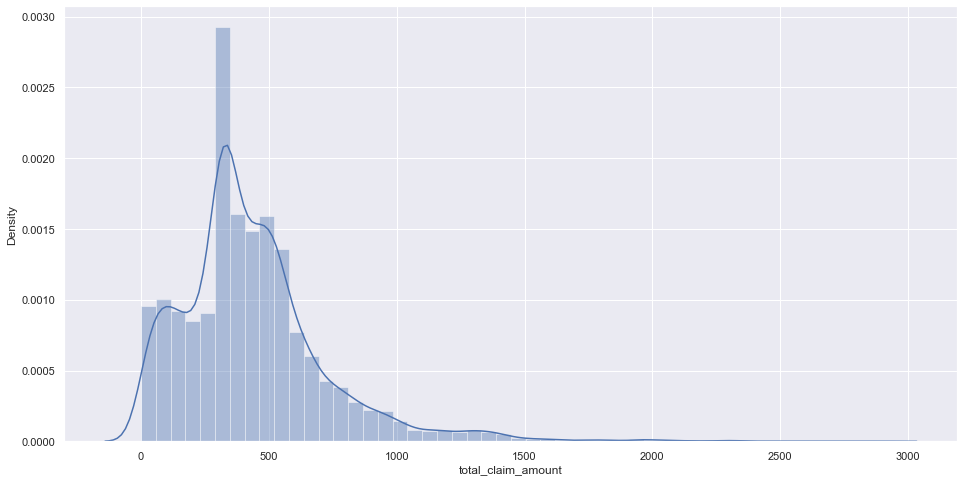

In [57]:
sns.distplot(continuous_df["total_claim_amount"])

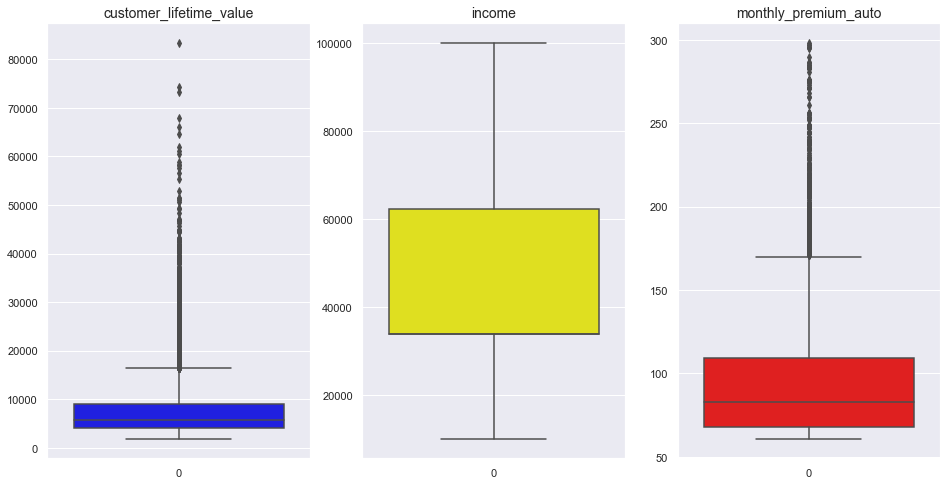

In [58]:
# how to find outliers, let's plot them 
box_colors = ["blue", "yellow", "red"]

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous[:3]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

In [ ]:
#mmm many outlies in blue and red! what to do with them? makes sense to keep them or not?

# lab 4 feature extraction

In [60]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


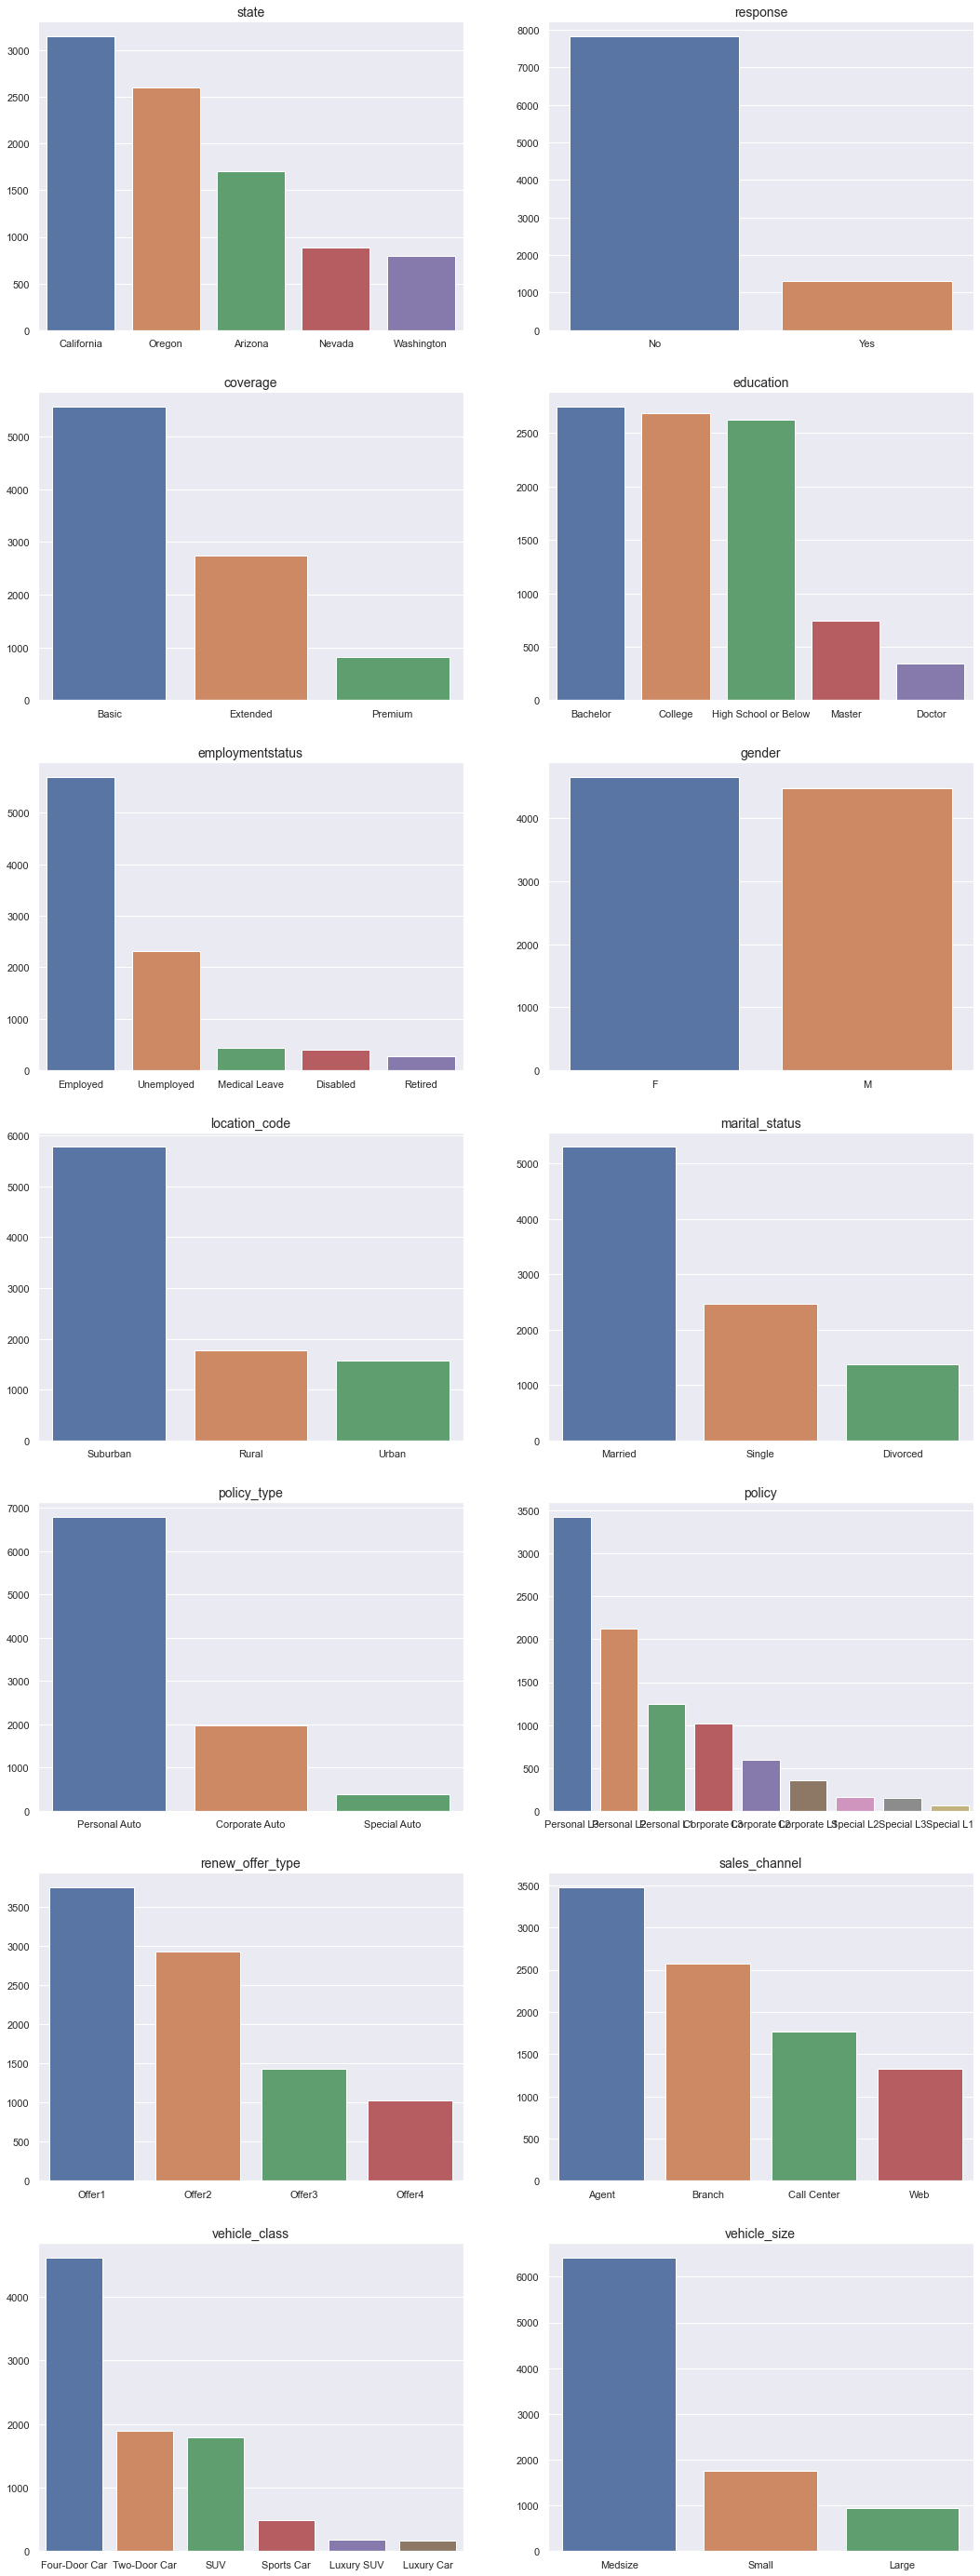

In [61]:
f, axes = plt.subplots(int(categorical_df.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categorical_df):

    sns.barplot(x = categorical_df[col].value_counts().index,
                y = categorical_df[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()


In [62]:
#any observation?
#we can cluster categories policy, and dive more into it 

In [64]:
policy = categorical["policy"].apply(lambda x: x[:-2])
policy

0       Corporate 
1        Personal 
2        Personal 
3       Corporate 
4        Personal 
           ...    
9129     Personal 
9130    Corporate 
9131    Corporate 
9132     Personal 
9133    Corporate 
Name: policy, Length: 9134, dtype: object

In [65]:
policy.value_counts()

Personal      6788
Corporate     1968
Special        378
Name: policy, dtype: int64

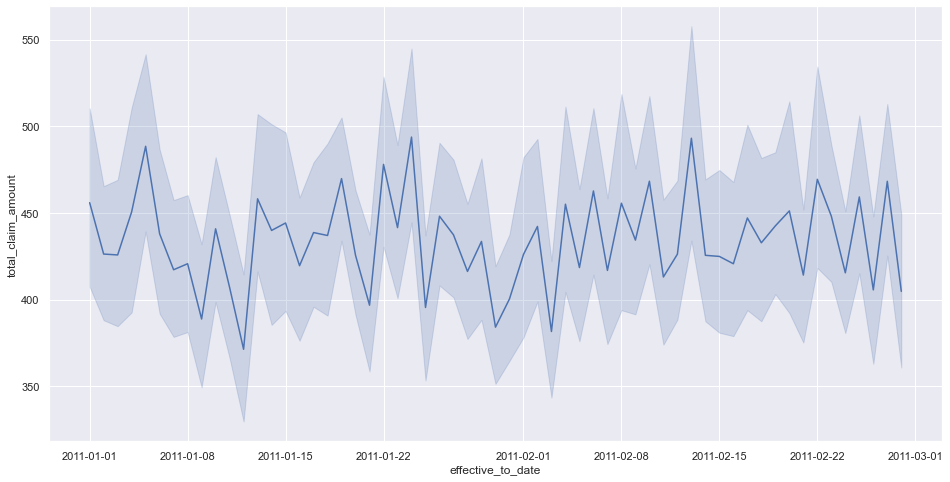

In [66]:
# time variable the effective date
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = data);


In [68]:
#lets divide data into day/weeks/months, the target
time_df = pd.DataFrame()
time_df["day"] = data["effective_to_date"].dt.day
time_df["week"] = data["effective_to_date"].dt.week
time_df["month"] = data["effective_to_date"].dt.month
time_df["target"] = data["total_claim_amount"]
time_df

,day,week,month,target
0,24,8,2,384.811147
1,31,5,1,1131.464935
2,19,7,2,566.472247
3,20,3,1,529.881344
4,3,5,2,138.130879
...,...,...,...,...
9129,10,6,2,198.234764
9130,12,6,2,379.200000
9131,6,5,2,790.784983
9132,3,5,2,691.200000


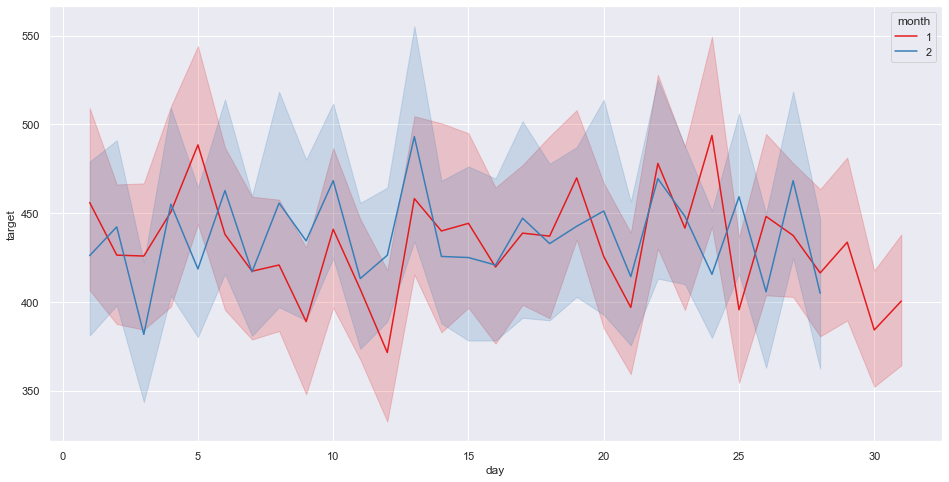

In [69]:
sns.lineplot(x = time_df.day, y=time_df.target, hue = time_df.month, palette="Set1");

In [72]:
time_df['month'].value_counts()

1    4898
2    4236
Name: month, dtype: int64

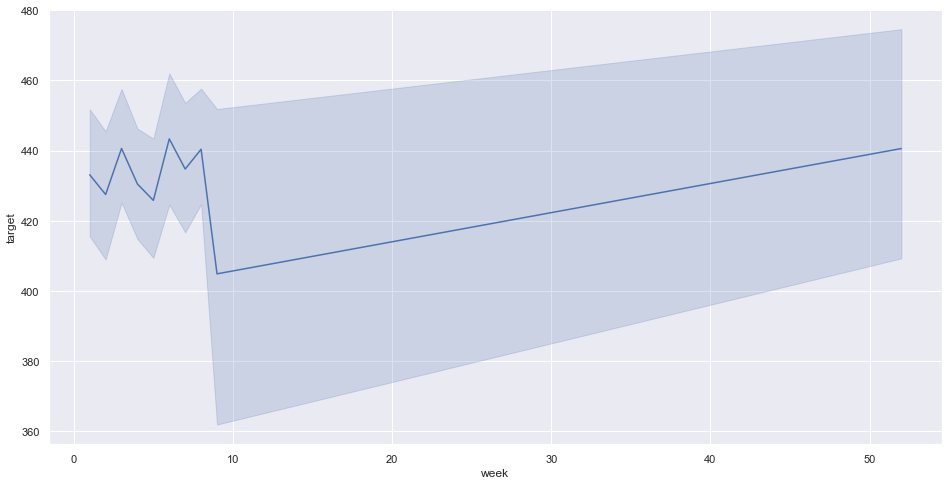

In [73]:
sns.lineplot(x = time_df.week, y = time_df.target);

# Lab 5 data wrangling

In [74]:
# we have no null values, but what w edo with outliers? 
data['income'].describe()

count     9134.000000
mean     46254.048664
std      22200.666227
min      10037.000000
25%      33889.500000
50%      33893.250000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [75]:
data['customer_lifetime_value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [76]:
# let's use normalization method to deal with outliers
def outliers(column, threshold = 3):
    df = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    return df

In [77]:
#create two variables 

clv_outliers = outliers(data["customer_lifetime_value"])
mpa_outliers = outliers(data["monthly_premium_auto"])

In [78]:
to_drop = clv_outliers.index | mpa_outliers.index # Union

In [79]:
clean_data = data.drop(to_drop).reset_index(drop = True)
clean_data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941.0,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8749,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604.0,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8750,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,33889.5,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8751,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941.0,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


<AxesSubplot:>

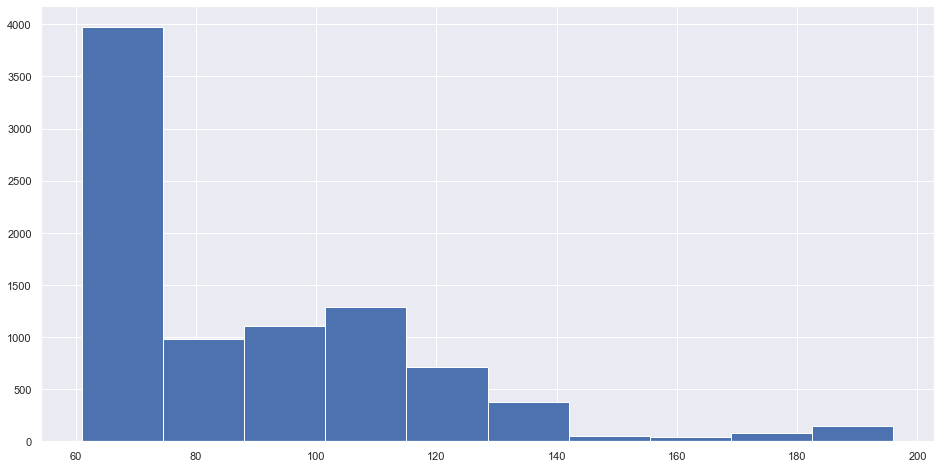

In [85]:
#hist
clean_data['monthly_premium_auto'].hist()

# data wrangling 

In [87]:
# let's have a copy 
df_clean = clean_data.copy()

In [89]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       8753 non-null   object        
 1   state                          8753 non-null   object        
 2   customer_lifetime_value        8753 non-null   float64       
 3   response                       8753 non-null   object        
 4   coverage                       8753 non-null   object        
 5   education                      8753 non-null   object        
 6   effective_to_date              8753 non-null   datetime64[ns]
 7   employmentstatus               8753 non-null   object        
 8   gender                         8753 non-null   object        
 9   income                         8753 non-null   float64       
 10  location_code                  8753 non-null   object        
 11  marital_status   